<H1>
<center> Indian Institute of Technology, Goa <center>
<br>
<center> Machine learning CS331 </center>
<br>
<center> Course Instructor: Dr Satyanath Bhat <center>
<br>
<center> Lab Assignment 3 </center> 
</H1>
<H2>
<center> GroupID: RuAsRaDe </center>
<br>
<center> Group Details </center>
</H2>
    
| Name             | Roll No.|
|------------------|---------|
| Rujul Dwivedi | 2103319 |
| Ashish Kumar Rathore | 2103304 |
| Rahul Saini   | 2103318 |
| Deepak Kumar  | 2103308 |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
df = pd.read_csv('faithful.csv')
df= df.drop('Unnamed: 0',axis=1)
df.columns = ['eruptions','waiting']

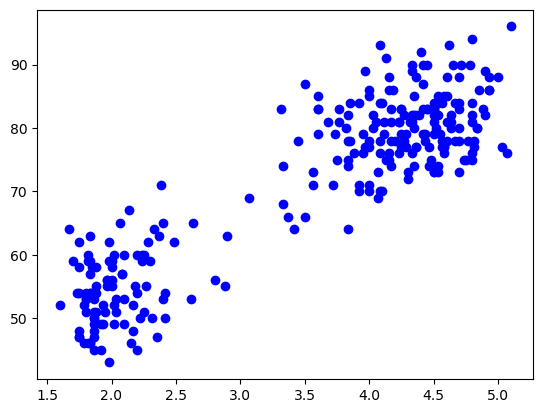

In [3]:
plt.scatter(df['eruptions'],df['waiting'], c = 'blue', marker = 'o',label = 'Displaying points on a graph'  )
plt.show()

In [4]:
def Estep(X, centroids):   
    distance= np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)    
    final_labels = np.argmin(distance, axis=1)
    return final_labels

In [5]:
def Mstep(X,centroids,labels):
    K = centroids.shape[0]
    for k in range(K):
        centroids[k, :] = np.mean(X[labels == k, :], axis=0)
    return centroids

In [6]:
def convergence(prev_centroid, new_centroid):
    return np.linalg.norm(prev_centroid - new_centroid)

In [7]:
def CostFn(centroids, labels):
    k = len(centroids)
    total_cost = 0    
    for i in range(k):
        X_i = X[labels == i]  # get data points assigned to the cluster i 
        centroid_i = centroids[i]  # get centroid of cluster i
        distances = np.linalg.norm(X_i - centroid_i, axis=1)  # calculate the distances from the centroid
        total_cost += np.sum(distances ** 2)  # sum up the squared distances
        
    return total_cost

In [8]:
def fx(x,p1,p2):
    return (p1[1]+p2[1])/2 - (x-(p1[0]+p2[0])/2)*((p2[0]-p1[0])/(p2[1]-p1[1]))

number of iterations required : 5


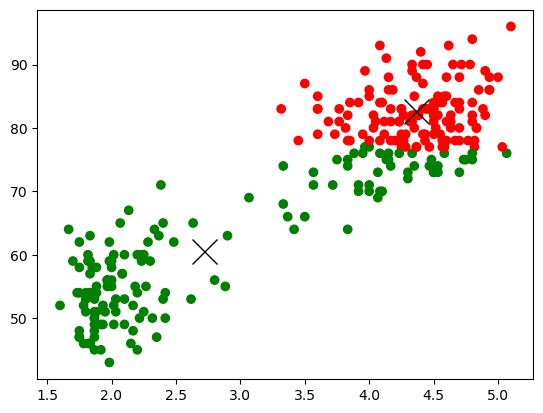

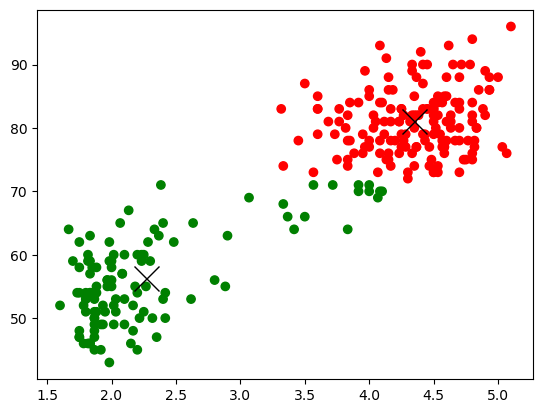

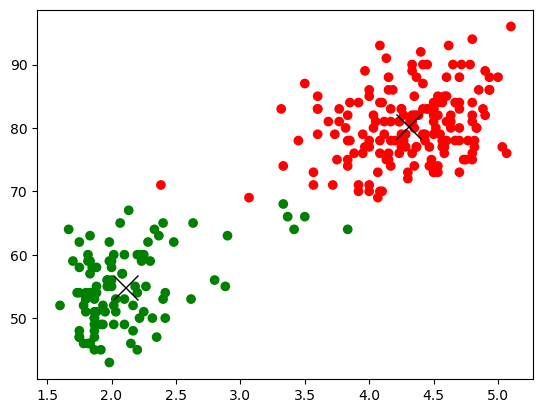

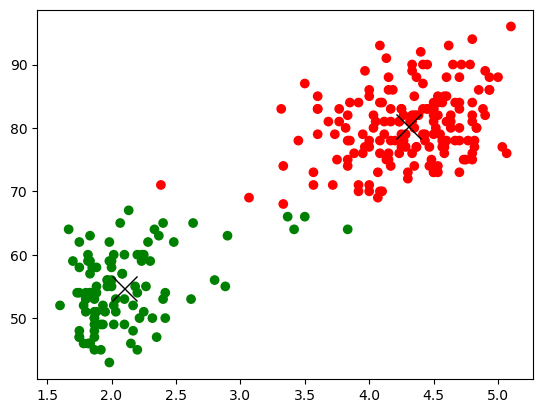

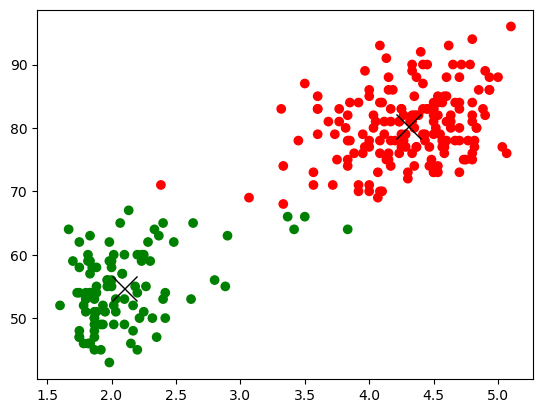

In [9]:
e = 0.000001
X = df.values
K=2
new_centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
prev_centroids = np.zeros((K, 2))
counter = 0
likelihood = []
label_color=['r','b']
while(convergence(new_centroids,prev_centroids)>e):
    prev_centroids=copy.deepcopy(new_centroids)
    label = Estep(X, new_centroids)
    likelihood.append(CostFn(new_centroids, label))    
    new_centroids = Mstep(X,new_centroids, label)
    likelihood.append(CostFn(new_centroids, label))        
    plt.figure()
    colormap = np.array(['r', 'g'])
    plt.scatter(x=df['eruptions'], y=df['waiting'], c = colormap[label])
    
#     x = np.linspace(1.3,5)
#     y=fx(x,mu[1,:],mu[1,:])
#     plt.plot(x,y,label = ' random boundary')
    
    for i in range(0, K):
        plt.plot(new_centroids[i][0], new_centroids[i][1], marker="x",markersize=18, markeredgecolor="black")
    
    counter= counter+1
print("number of iterations required : %d" %counter)


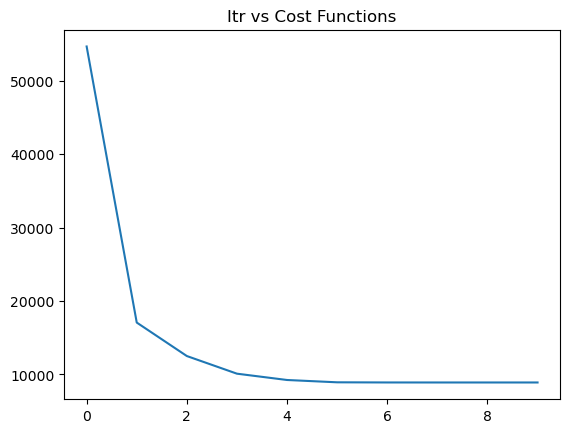

In [10]:
plt.plot(range(2*counter),likelihood)
plt.title('Itr vs Cost Functions')
plt.show()